### Import Libraries

In [102]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering

### Make Request to wikipedia

In [2]:
url = "https://en.wikipedia.org/wiki/Human_body_weight"

In [3]:
response = requests.get(url=url , headers={'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36'})
response

<Response [200]>

In [4]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Human body weight - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 

### Make response at Html code using BeautifulSoup

In [5]:
html = BeautifulSoup(response.text , 'html.parser')
html

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Human body weight - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vect

### Get tables wikitable 

In [7]:
tables = html.find_all('table' , {'class' : 'wikitable'})
tables

[<table class="wikitable sortable">
 <tbody><tr>
 <th>Region
 </th>
 <th>Adult <br/> population<br/>(millions)
 </th>
 <th>Average weight
 </th>
 <th>% <br/> Overweight
 </th>
 <th><style data-mw-deduplicate="TemplateStyles:r1038841319">.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}</style><span class="rt-commentedText tooltip tooltip-dotted" title="Reference">Ref</span>
 </th></tr>
 <tr>
 <td><a href="/wiki/Africa" title="Africa">Africa</a></td>
 <td>535</td>
 <td>60.7 kg (133.8 lb)</td>
 <td>28.9%</td>
 <td><sup class="reference" id="cite_ref-biomed_11-0"><a href="#cite_note-biomed-11"><span class="cite-bracket">[</span>11<span class="cite-bracket">]</span></a></sup>
 </td></tr>
 <tr>
 <td><a href="/wiki/Asia" title="Asia">Asia</a></td>
 <td>2,815</td>
 <td>57.7 kg (127.2 lb)</td>
 <td>24.2%</td>
 <td><sup class="reference" id="cite_ref-biomed_11-1"><a href="#cite_note-biomed-11"><span class="cite-bracket">[</span>11<span class="cite-bracket">]</span></a></su

### Get Table has Average weight around the world by country

In [12]:
country_table = tables[1]
country_table

<table class="wikitable sortable mw-collapsible">
<tbody><tr>
<th>Country
</th>
<th>Average male weight
</th>
<th>Average female weight
</th>
<th>Sample population /<br/> age range
</th>
<th><link href="mw-data:TemplateStyles:r1038841319" rel="mw-deduplicated-inline-style"/><span class="rt-commentedText tooltip tooltip-dotted" title="Methodology">Method</span>
</th>
<th>Year
</th>
<th><link href="mw-data:TemplateStyles:r1038841319" rel="mw-deduplicated-inline-style"/><span class="rt-commentedText tooltip tooltip-dotted" title="Reference">Ref</span>
</th></tr>
<tr>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="500" data-file-width="1000" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_the_Taliban.svg/23px-Flag_of_the_Taliban.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_the_Taliban.svg/35px-Flag_of_the_Taliban.svg.png 1.5x, 

### convert table to dataframe

In [20]:
df = pd.read_html(str(country_table))[0]

C:\Users\elmnshawy\AppData\Local\Temp\ipykernel_10440\3118881037.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(country_table))[0]


# Data Representation

In [22]:
df.head(11)

,Country,Average male weight,Average female weight,Sample population / age range,Method,Year,Ref
0,Afghanistan,69.2 kg (152.6 lb),62.6 kg (138.0 lb),18–69,Measured,2018,[12]
1,Algeria,68.7 kg (151.5 lb),65.1 kg (143.5 lb),25–64,Measured,2005,[13]
2,Armenia,74.6 kg (164.5 lb),66.4 kg (146.4 lb),18–69,Measured,2016,[14]
3,Australia,87.0 kg (191.8 lb),71.8 kg (158.3 lb),18+,Measured,2018,[15]
4,Azerbaijan,72.1 kg (159.0 lb),65.7 kg (144.8 lb),16+,Measured,2005,[16]
5,Bangladesh,55.2 kg (121.7 lb),49.8 kg (109.8 lb),25+,Measured,2009–2010,[17]
6,Belarus,69 kg (152.1 lb),56 kg (123.5 lb),18+,Measured,2008,[18]
7,Belize,74.2 kg (163.6 lb),70.5 kg (155.4 lb),20+,Measured,2010,[19]
8,Benin,63.7 kg (140.4 lb),60.9 kg (134.3 lb),18–69,Measured,2015,[20]
9,Bhutan,63.2 kg (139.3 lb),57.4 kg (126.5 lb),18–69,Measured,2014,[21]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Country                         52 non-null     object
 1   Average male weight             52 non-null     object
 2   Average female weight           52 non-null     object
 3   Sample population /  age range  52 non-null     object
 4   Method                          52 non-null     object
 5   Year                            52 non-null     object
 6   Ref                             52 non-null     object
dtypes: object(7)
memory usage: 3.0+ KB


In [24]:
df.describe()

,Country,Average male weight,Average female weight,Sample population / age range,Method,Year,Ref
count,52,52,52,52,52,52,52
unique,52,47,50,15,2,29,52
top,Afghanistan,84.6 kg (186.5 lb),59.0 kg (130.1 lb),18–69,Measured,2018,[12]
freq,1,2,3,9,49,4,1


# Data wrangling

### Drop Ref column

In [25]:
df.drop(columns='Ref' , inplace=True)
df.head()

,Country,Average male weight,Average female weight,Sample population / age range,Method,Year
0,Afghanistan,69.2 kg (152.6 lb),62.6 kg (138.0 lb),18–69,Measured,2018
1,Algeria,68.7 kg (151.5 lb),65.1 kg (143.5 lb),25–64,Measured,2005
2,Armenia,74.6 kg (164.5 lb),66.4 kg (146.4 lb),18–69,Measured,2016
3,Australia,87.0 kg (191.8 lb),71.8 kg (158.3 lb),18+,Measured,2018
4,Azerbaijan,72.1 kg (159.0 lb),65.7 kg (144.8 lb),16+,Measured,2005


### Extract Averagae male weight  column to two columns [Avg_male_weight_Kg , Avg_male_weight_lb]

In [45]:
# Avg_male_weigth_Kg
df['Avg_male_weight_Kg'] = df['Average male weight'].str.extract(r'^(\d+\.\d+)')
df['Avg_male_weight_Kg'] = pd.to_numeric(df['Avg_male_weight_Kg'] , errors='coerce')

In [47]:
# Avg_male_weigth_lb
df['Avg_male_weight_lb'] = df['Average male weight'].str.extract(r'\((\d+\.\d+)\s*lb\)')
df['Avg_male_weight_lb'] = pd.to_numeric(df['Avg_male_weight_lb'] , errors='coerce')

### Extract Averagae female weight  column to two columns [Avg_female_weight_Kg , Avg_female_weight_lb]

In [48]:
# Avg_female_weight_kg
df['Avg_female_weight_Kg'] = df['Average female weight'].str.extract(r'^(\d+\.\d+)')
df['Avg_female_weight_Kg'] = pd.to_numeric(df['Avg_female_weight_Kg'] , errors='coerce')

In [49]:
# Avg_female_weight_lb
df['Avg_female_weight_lb'] = df['Average female weight'].str.extract(r'\((\d+\.\d+)\s*lb\)')
df['Avg_female_weight_lb'] = pd.to_numeric(df['Avg_female_weight_lb'] , errors='coerce')

### Drop Average male weight and Average female weight columns

In [51]:
df.drop(columns=['Average male weight' , 'Average female weight'] , inplace=True)

In [53]:
df.head()

,Country,Sample population / age range,Method,Year,Avg_male_weight_Kg,Avg_male_weight_lb,Avg_female_weight_Kg,Avg_female_weight_lb
0,Afghanistan,18–69,Measured,2018,69.2,152.6,62.6,138.0
1,Algeria,25–64,Measured,2005,68.7,151.5,65.1,143.5
2,Armenia,18–69,Measured,2016,74.6,164.5,66.4,146.4
3,Australia,18+,Measured,2018,87.0,191.8,71.8,158.3
4,Azerbaijan,16+,Measured,2005,72.1,159.0,65.7,144.8


### Rename Smaple population/age range to S_age_range  

In [59]:
df.rename(columns={'Sample population /  age range' : 'Age_range'} , inplace=True)

In [60]:
df.head()

,Country,Age_range,Method,Year,Avg_male_weight_Kg,Avg_male_weight_lb,Avg_female_weight_Kg,Avg_female_weight_lb
0,Afghanistan,18–69,Measured,2018,69.2,152.6,62.6,138.0
1,Algeria,25–64,Measured,2005,68.7,151.5,65.1,143.5
2,Armenia,18–69,Measured,2016,74.6,164.5,66.4,146.4
3,Australia,18+,Measured,2018,87.0,191.8,71.8,158.3
4,Azerbaijan,16+,Measured,2005,72.1,159.0,65.7,144.8


### Make new column Avg_age 

In [64]:
# Function extract_avg() 
def extract_avg(value) : 
    if '-' in value : 
        n1 , n2 = map(int, value.split('-'))
        return (n1 + n2)/2 # return avg 
    if '+' in value : 
        return int(value.replace('+' , ''))
    return value

In [67]:
# new column Avg_age
df['Avg_age'] = df['Age_range'].apply(extract_avg)

In [68]:
df.head()

,Country,Age_range,Method,Year,Avg_male_weight_Kg,Avg_male_weight_lb,Avg_female_weight_Kg,Avg_female_weight_lb,Avg_age
0,Afghanistan,18–69,Measured,2018,69.2,152.6,62.6,138.0,43.5
1,Algeria,25–64,Measured,2005,68.7,151.5,65.1,143.5,44.5
2,Armenia,18–69,Measured,2016,74.6,164.5,66.4,146.4,43.5
3,Australia,18+,Measured,2018,87.0,191.8,71.8,158.3,18
4,Azerbaijan,16+,Measured,2005,72.1,159.0,65.7,144.8,16


### Check missing value

In [69]:
df.isnull().sum()

Country                 0
Age_range               0
Method                  0
Year                    0
Avg_male_weight_Kg      1
Avg_male_weight_lb      2
Avg_female_weight_Kg    1
Avg_female_weight_lb    2
Avg_age                 0
dtype: int64

#### Replace missing values

In [92]:
  
df.fillna(df.iloc[: , 4:8].mean() , inplace=True)

In [93]:
df.isnull().sum()

Country                 0
Age_range               0
Method                  0
Year                    0
Avg_male_weight_Kg      0
Avg_male_weight_lb      0
Avg_female_weight_Kg    0
Avg_female_weight_lb    0
Avg_age                 0
dtype: int64

### Check duplicated values 

In [31]:
df.duplicated().sum()

0

# Exploarity data analysis EDA

In [94]:
df.head()

,Country,Age_range,Method,Year,Avg_male_weight_Kg,Avg_male_weight_lb,Avg_female_weight_Kg,Avg_female_weight_lb,Avg_age
0,Afghanistan,18–69,Measured,2018,69.2,152.6,62.6,138.0,43.5
1,Algeria,25–64,Measured,2005,68.7,151.5,65.1,143.5,44.5
2,Armenia,18–69,Measured,2016,74.6,164.5,66.4,146.4,43.5
3,Australia,18+,Measured,2018,87.0,191.8,71.8,158.3,18
4,Azerbaijan,16+,Measured,2005,72.1,159.0,65.7,144.8,16


In [101]:
df['Method'].value_counts()

Method
Measured         49
Self-reported     3
Name: count, dtype: int64

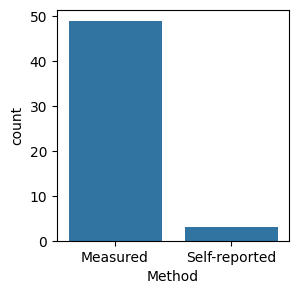

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x =df['Method'])
sns
plt.show()

In [147]:
df['Avg_male_weight_Kg'].describe()

count    52.000000
mean     74.873333
std       9.894936
min      55.200000
25%      65.850000
50%      75.100000
75%      84.100000
max      99.400000
Name: Avg_male_weight_Kg, dtype: float64

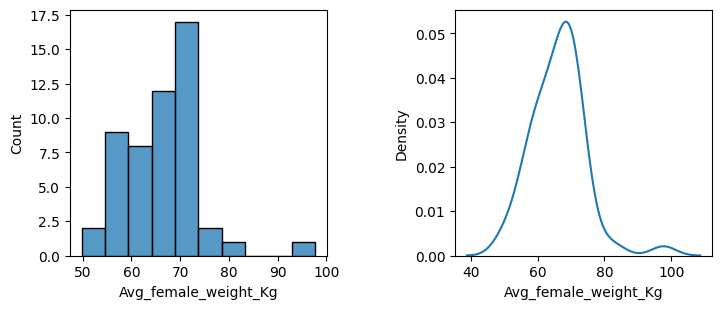

In [164]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(df['Avg_female_weight_Kg'], kde=False)
plt.subplot(1,2,2)
sns.kdeplot(df['Avg_female_weight_Kg'])
plt.tight_layout(pad=4)
plt.show()

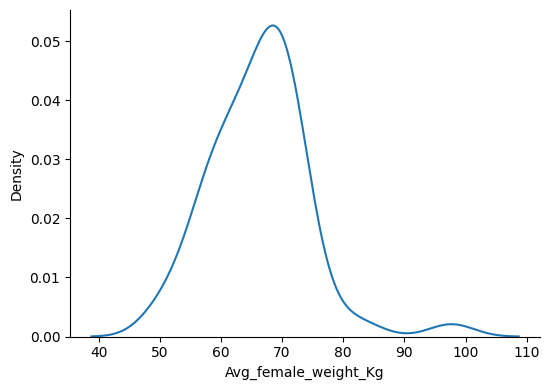

In [153]:
sns.displot(df['Avg_female_weight_Kg'] , kind= 'kde' , height=4 , aspect=1.4)

In [ ]:
#